<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/lecture2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ამოცანა პირველი:
### 1) არის თუ არა კორელაცია მოცემულ მონაცემებში სქესსა და ხელფასს შორის?
### 2) თამაშობს თუ არა ეს განსხვავება მნიშვნელოვან როლს?

### ამისთვის გამოვიყენებ boxplot, violin და hist დიაგრამებს, ნორმალიზაციის ტესტს (Shapiro–Wilk), უელჩის t-ტესტს და Mann–Whitney-ს ტესტს. შემდგომში მოხდება ტესტების შედეგების შედარება და დასკვნის გამოტანა.

In [9]:
# მონაცემების წაკითხვა

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/salary.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


### მამაკაცების საშუალო ხელფასი (მედიანა) ცოტა აღემატება დედაკაცების საშუალო ხელფასს, რაც იმის მანიშნებელი შეიძლება იყოს, რომ "საშუალო მამაკაცი" უფრო მეტს შოულობს, ვიდრე "საშუალო დედაკაცი".

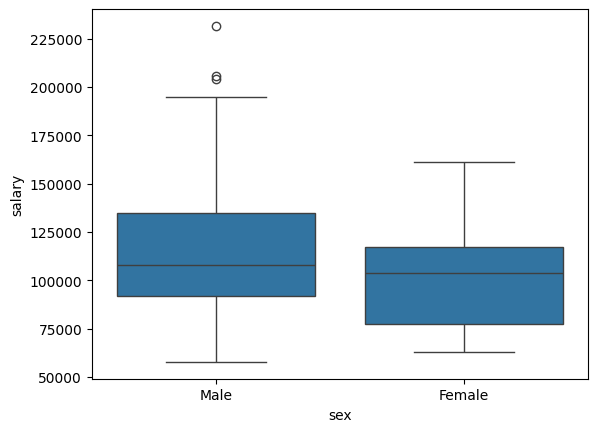

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="sex", y="salary", data=df)
plt.show()

### ასევე დიაგრამაზე ჩანს, რომ მამაკაცებს ხელფასი ზოგ შემთხვევაში 200.000+ აღწევს. იმისთვის, რომ დავიდასტუროთ მოსაზრებები, ავაგოთ violin დიაგრამა.

### Violin დიაგრამაზე ვხედავთ თითქმის იგივეს, მამაკაცების მედიანა ოდნავ ზემოთაა, მაგრამ ამ დიაგრამაზე ნათლად ჩანს მამაკაცების ხელფასების პიკი, როგორ მისწრაფება 250.000-მდე. დედაკაცების პიკი წყდება დაახლოებით 160.000-ზე.

### Boxplot და Violin დიაგრამები ერთად აჩვენებს, რომ განსხვავება არსებობს, მაგრამ ეს ძირითადად მამაკაცებში ზედა კუდით არის განპირობებული.

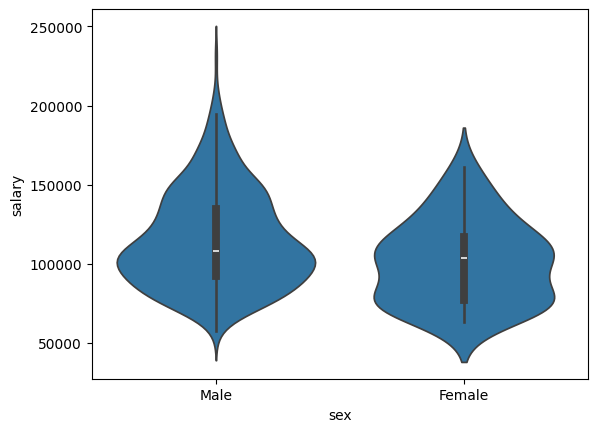

In [15]:
sns.violinplot(x="sex", y="salary", data=df)
plt.show()

### ეს განსხვავება დამოკიდებულია სქესზე თუ მონაცემთა სიმცირეზე? ამის გასააზრებლად გამოვიყენებ hist დიაგრამას.

### პარამეტრები: 1. data = მონაცემების წყარო 2. x; რომელ სვეტს ვიყენებთ ჰისტოგრამის ასაგებად 3. hue; კატეგორიის მიხედვით შეღებვა 4. stat; სიმკვრივის ნორმალიზაცია 5. kde; ზემოდან სიმკვრივის შეფასების ხაზს ამატებს.

### ამ დიაგრამაზე ვხედავს კონკრეტულ დიაპაზონში ხელფასის პოვნის ფარდობით ალბათობას. მამაკაცების გრაფიკი უფრო მაღალია, ეს ნიშნავს, რომ მამაკაცები უფრო მეტად პოულობენ ამ ხელფასებს, ვიდრე დედაკაცები. განაწილება მამაკაცებისთვის ზემოთაა მიმართული.

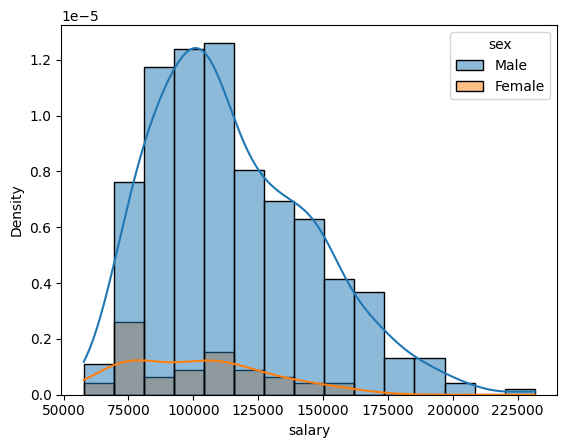

In [34]:
sns.histplot(data=df, x="salary", hue="sex", stat="density", kde=True)
plt.show()

### ჩავატაროთ 2 ტესტი და შევადაროთ მონაცემები.

In [32]:

from scipy import stats

men_salary = df[df['sex'] == 'Male']['salary']
women_salary = df[df['sex'] == 'Female']['salary']

# ნორმალიზაცია
print("Shapiro test (men):", stats.shapiro(men_salary))
print("Shapiro test (women):", stats.shapiro(women_salary))

# t-ტესტი
t_stat, p_value_t = stats.ttest_ind(men_salary, women_salary, equal_var=False)
print("t-stat =", t_stat, ", p-value =", p_value_t)

# u-ტესტი
u_stat, p_value_u = stats.mannwhitneyu(men_salary, women_salary, alternative="two-sided")
print("u-stat =", u_stat, ", p-value =", p_value_u)


Shapiro test (men): ShapiroResult(statistic=np.float64(0.9587671095948793), pvalue=np.float64(1.7346665409871556e-08))
Shapiro test (women): ShapiroResult(statistic=np.float64(0.9466484072430155), pvalue=np.float64(0.06338937501420648))
t-stat = 3.161474091674088 , p-value = 0.0026636179399639934
u-stat = 8779.5 , p-value = 0.00823686328755778


### Shapiro–Wilk-ის (ნორმალიზაციის) დროს ყურადღებას ვაქცევთ p-value-ს. თუ ის < 0.05 მაშინ განაწილება ნორმალური არ არის. თუ >= 0.05 - მაშინ ნორმალურია.

### მამაკაცების შემთხვევაში p-value 0-ისკენ მისწრაფება (1.7346665409871556e-08), რაც არანორმალურ განაწილებაზე ანიშნებს. დედაკაცების შემთხვევაში p-value = 0.063 (0.06338937501420648) -> 0.063 > 0.05 -> ნორმალური განაწილებაა.

### t-test-ის დროს თუ p-value < 0.05 მაშინ განსხვავება მნიშვნელოვანია და თუ პირიქით p-value >= 0.05 მაშინ განსხვავება სტატისტიკური არ არის და არ არის მნიშვნელოვანი.

### შედეგი: p = 0.0027 < 0.05; p-მნიშვნელობა 0.05-ზე ნაკლები -> საშუალო მაჩვენებლებს შორის სხვაობა მნიშვნელოვანია. მამაკაცების საშუალო ხელფასი სტატისტიკურად უფრო მაღალია, ვიდრე დედაკაცების საშუალო ხელფასი.

### **აქ საყურადღებოა, რომ t-ტესტი სენსიტიურია ნორმალიზებულ მონაცემებთან, რაც იმას ნიშნავს, რომ არანორმალიზების შემთხვევაში (ჩვენს შემთხვევაში) შეუძლია არასწორი შედეგი გვაჩვენოს, ამიტომ გვჭირდება u-ტესტი, რომელიც არაპარამეტრული ტესტია - ის არა მხოლოდ საშუალო მაჩვენებლებს, არამედ მთლიანად განაწილებას განიხილავს.**

### u-ტესტის მიხედვით: p = 0.0082 < 0.05 => ხელფასების განაწილება განსხვავდება მამაკაცებსა და ქალებს შორის. ხელფასები სისტემატურად განსხვავდება მამაკაცებსა და ქალებს შორის, მაშინაც კი, თუ მონაცემები ნორმალური არ არის და არსებობს გამონაკლისები.

### **დასკვნა: ამ dataset-ში მამაკაცებისა და დედაკაცების ხელფასებს შორის სტატისტიკურად მნიშვნელოვანი განსხვავებაა. თუმცა აღსანიშნავია, რომ მოცემულ ცხრილს აქვს დაახლოების 400 სტრიქონი, რაც ცოტაა ფართო კონტექსტის განხილვისთვის. ამ მონაცემებში განსხვავება აშკარაა, თუმცა უფრო დეტალური დასკვნისთვის მეტი ნორმალიზირებული მონაცემების მოგროვებაა საჭირო.**